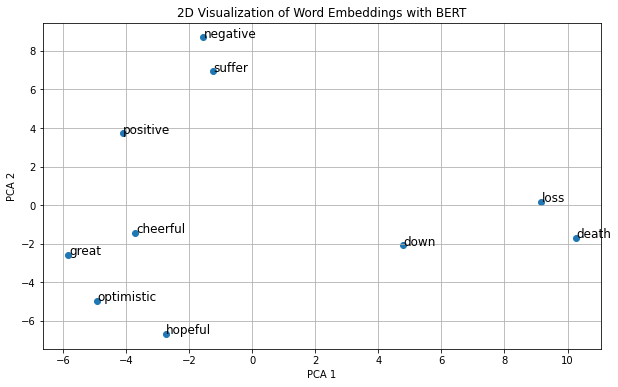

In [1]:
from transformers import BertTokenizer, BertModel
import torch
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Initialize tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Example list of words
words = ["hopeful",'positive','cheerful','optimistic','great','suffer','loss','death','negative','down']

# Tokenize words and obtain embeddings
input_tokens = tokenizer(words, padding=True, return_tensors='pt', add_special_tokens=False)
with torch.no_grad():
    outputs = model(**input_tokens)
embeddings = outputs.last_hidden_state.mean(dim=1)  # Mean pooling

# Dimensionality reduction to 2D using PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings.numpy())

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])
for i, word in enumerate(words):
    plt.text(embeddings_2d[i, 0]+0.02, embeddings_2d[i, 1]+0.02, word, fontsize=12)
plt.title('2D Visualization of Word Embeddings with BERT')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()


In [3]:
# First, find the 2D positions of "positive" and "negative"
words_extended = ['positive', 'negative'] + words
input_tokens_extended = tokenizer(words_extended, padding=True, return_tensors='pt', add_special_tokens=False)
with torch.no_grad():
    outputs_extended = model(**input_tokens_extended)
embeddings_extended = outputs_extended.last_hidden_state.mean(dim=1)  # Mean pooling
embeddings_2d_extended = PCA(n_components=2).fit_transform(embeddings_extended.numpy())

# Extract 2D positions for "positive" and "negative"
positive_2d = embeddings_2d_extended[0]
negative_2d = embeddings_2d_extended[1]

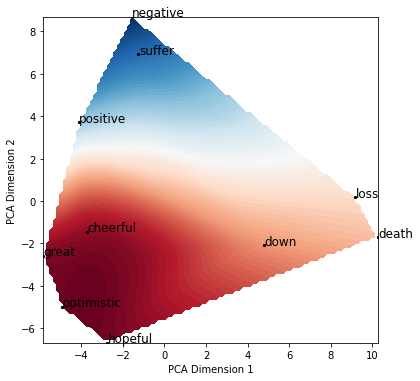

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy.spatial import distance

# Assuming embeddings_2d, positive_2d, and negative_2d are already defined
# Compute the relative distance for each point
distances = np.array([distance.euclidean(pos, positive_2d) - distance.euclidean(pos, negative_2d) for pos in embeddings_2d])

# Create a grid over the 2D space
grid_x, grid_y = np.mgrid[min(embeddings_2d[:, 0]):max(embeddings_2d[:, 0]):100j, min(embeddings_2d[:, 1]):max(embeddings_2d[:, 1]):100j]

# Interpolate the distances onto the grid
grid_z = griddata(embeddings_2d, distances, (grid_x, grid_y), method='cubic')

# Plot the contour heatmap
plt.figure(figsize=(6, 6))
contour = plt.contourf(grid_x, grid_y, grid_z, levels=100, cmap='RdBu')
#plt.colorbar(contour)

# Optionally, plot the original points on top
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], color='k', s=5)
for i, word in enumerate(words):
    plt.text(embeddings_2d[i, 0]+0.02, embeddings_2d[i, 1]+0.02, word, fontsize=12,color = 'black')


plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.savefig('bert_space.png',transparent = True)
plt.show()
